ZOMATO DATASET - EXPLORATORY DATA ANALYSIS

1. INITIAL DATA INSPECTION
----------------------------------------
Dataset Shape: (148, 7)
Number of Restaurants: 148
Number of Features: 7

Column Names and Data Types:
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

First 5 rows:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buff

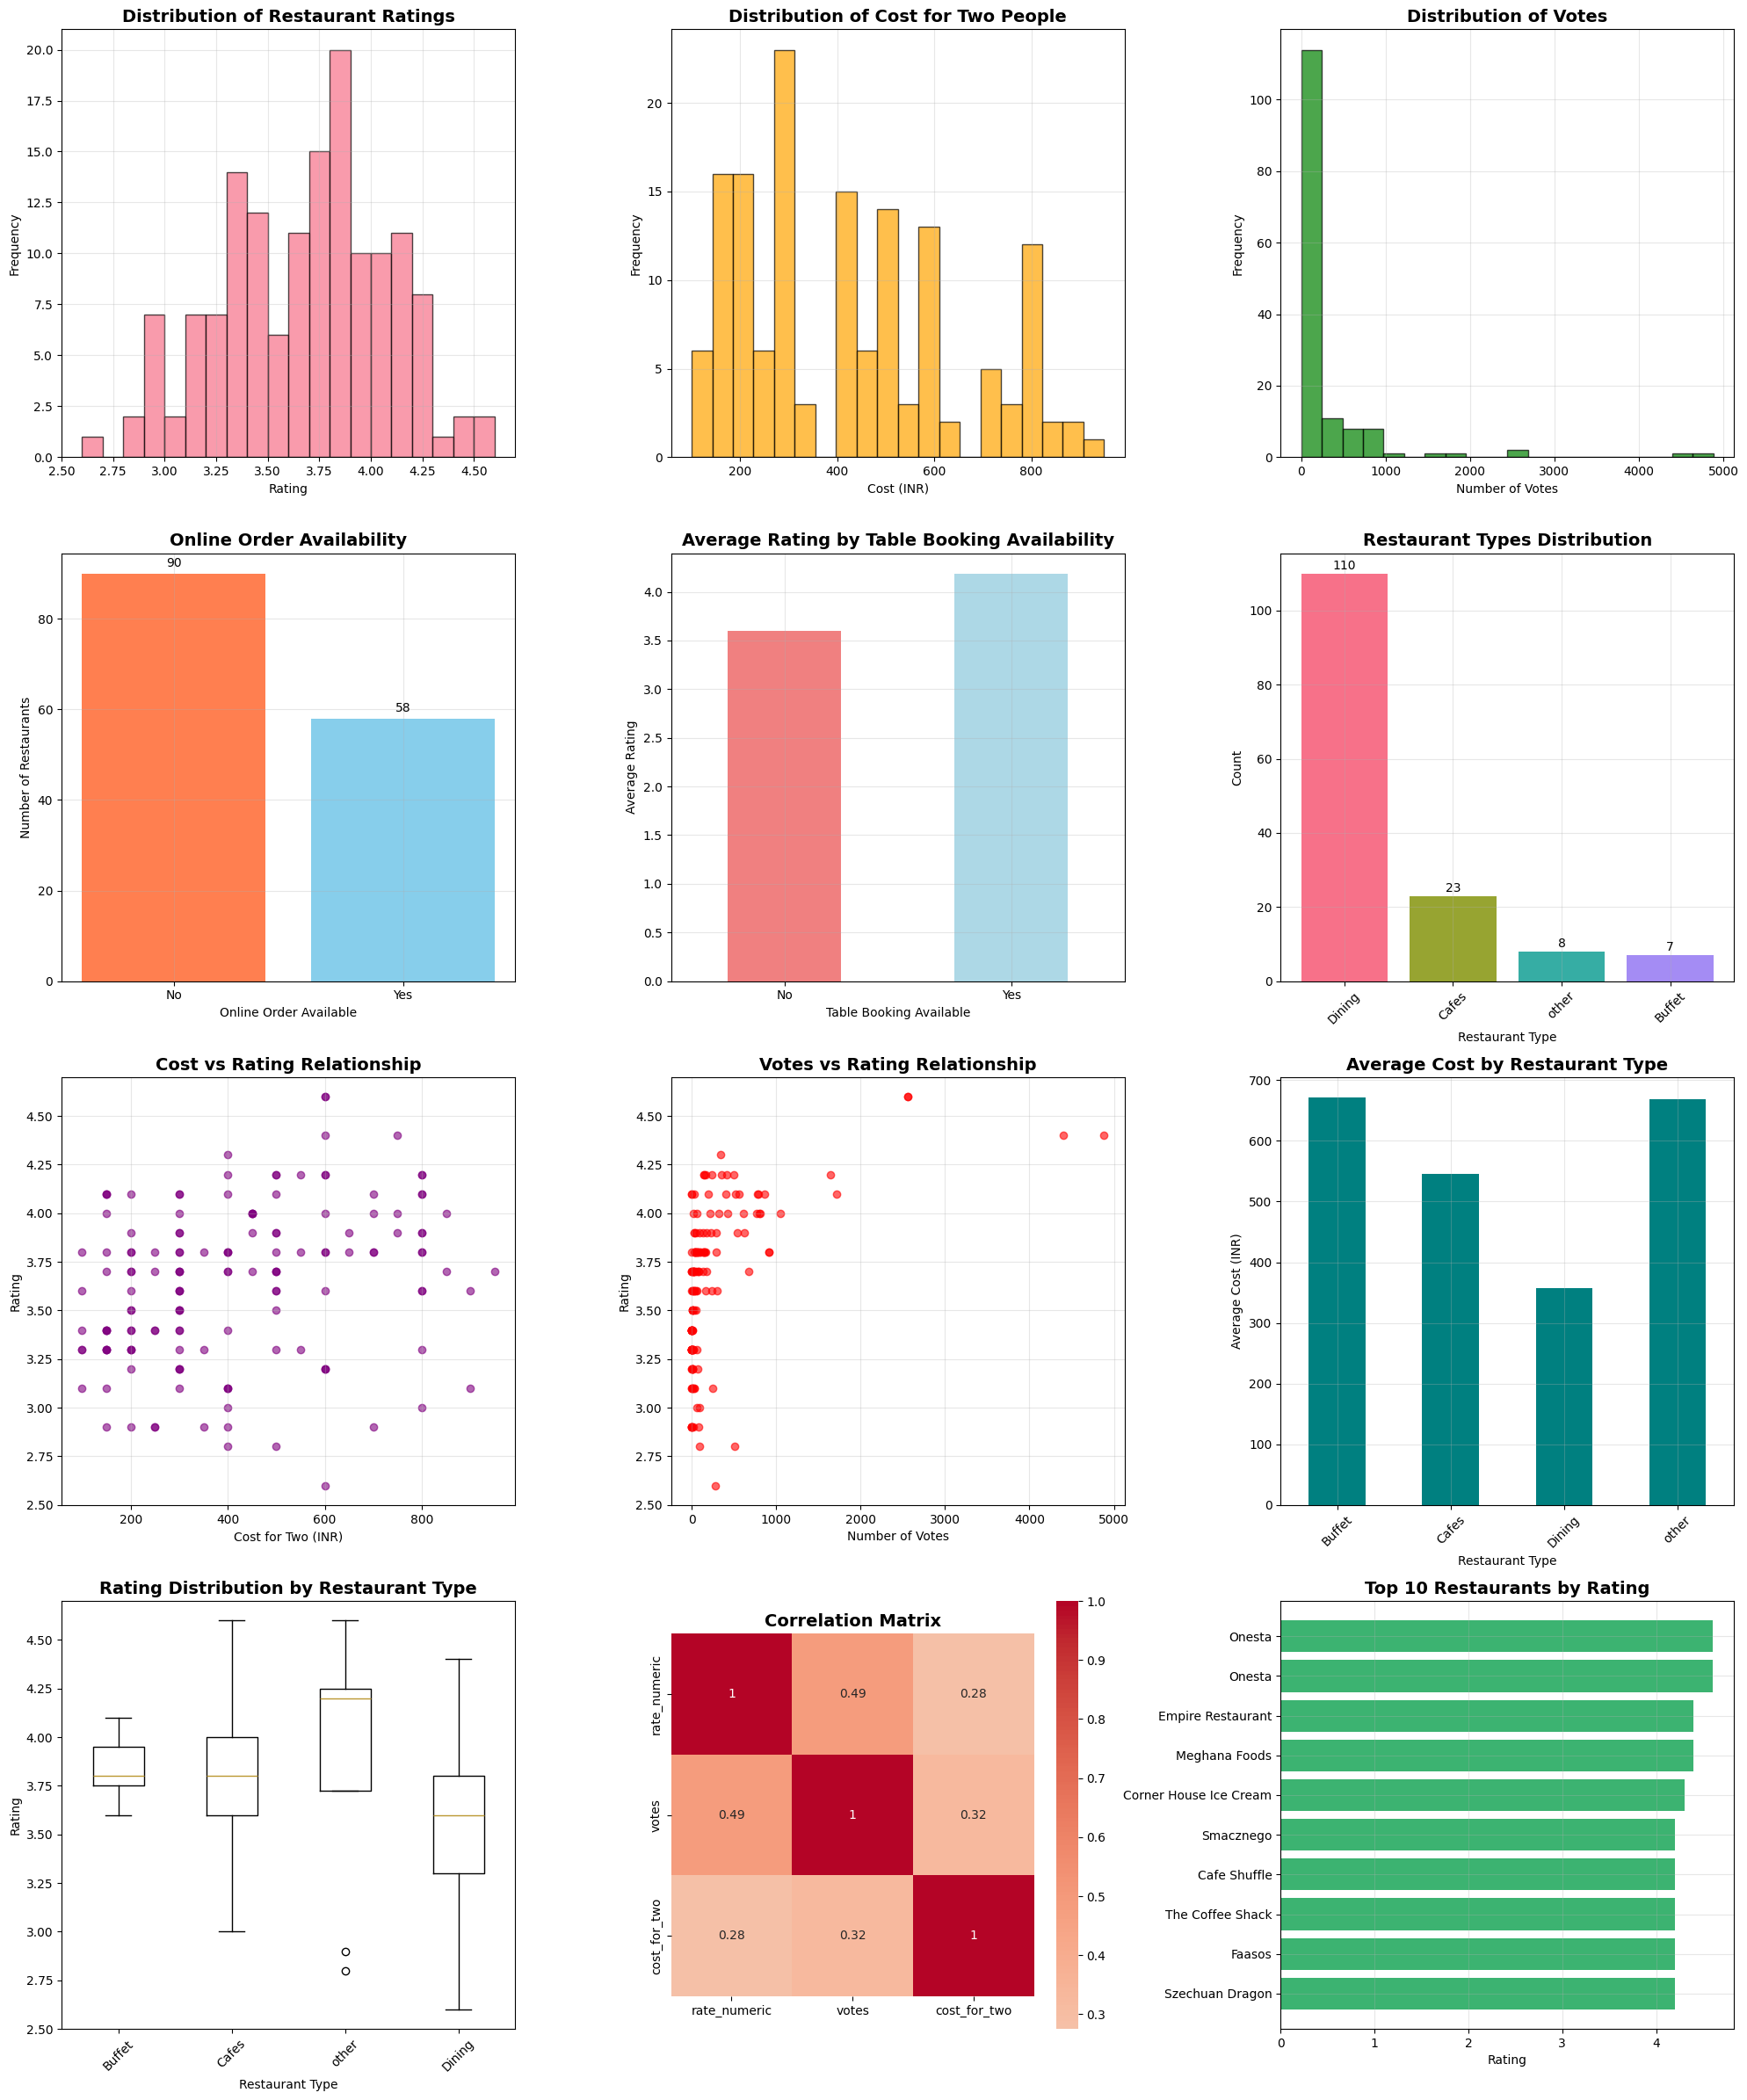

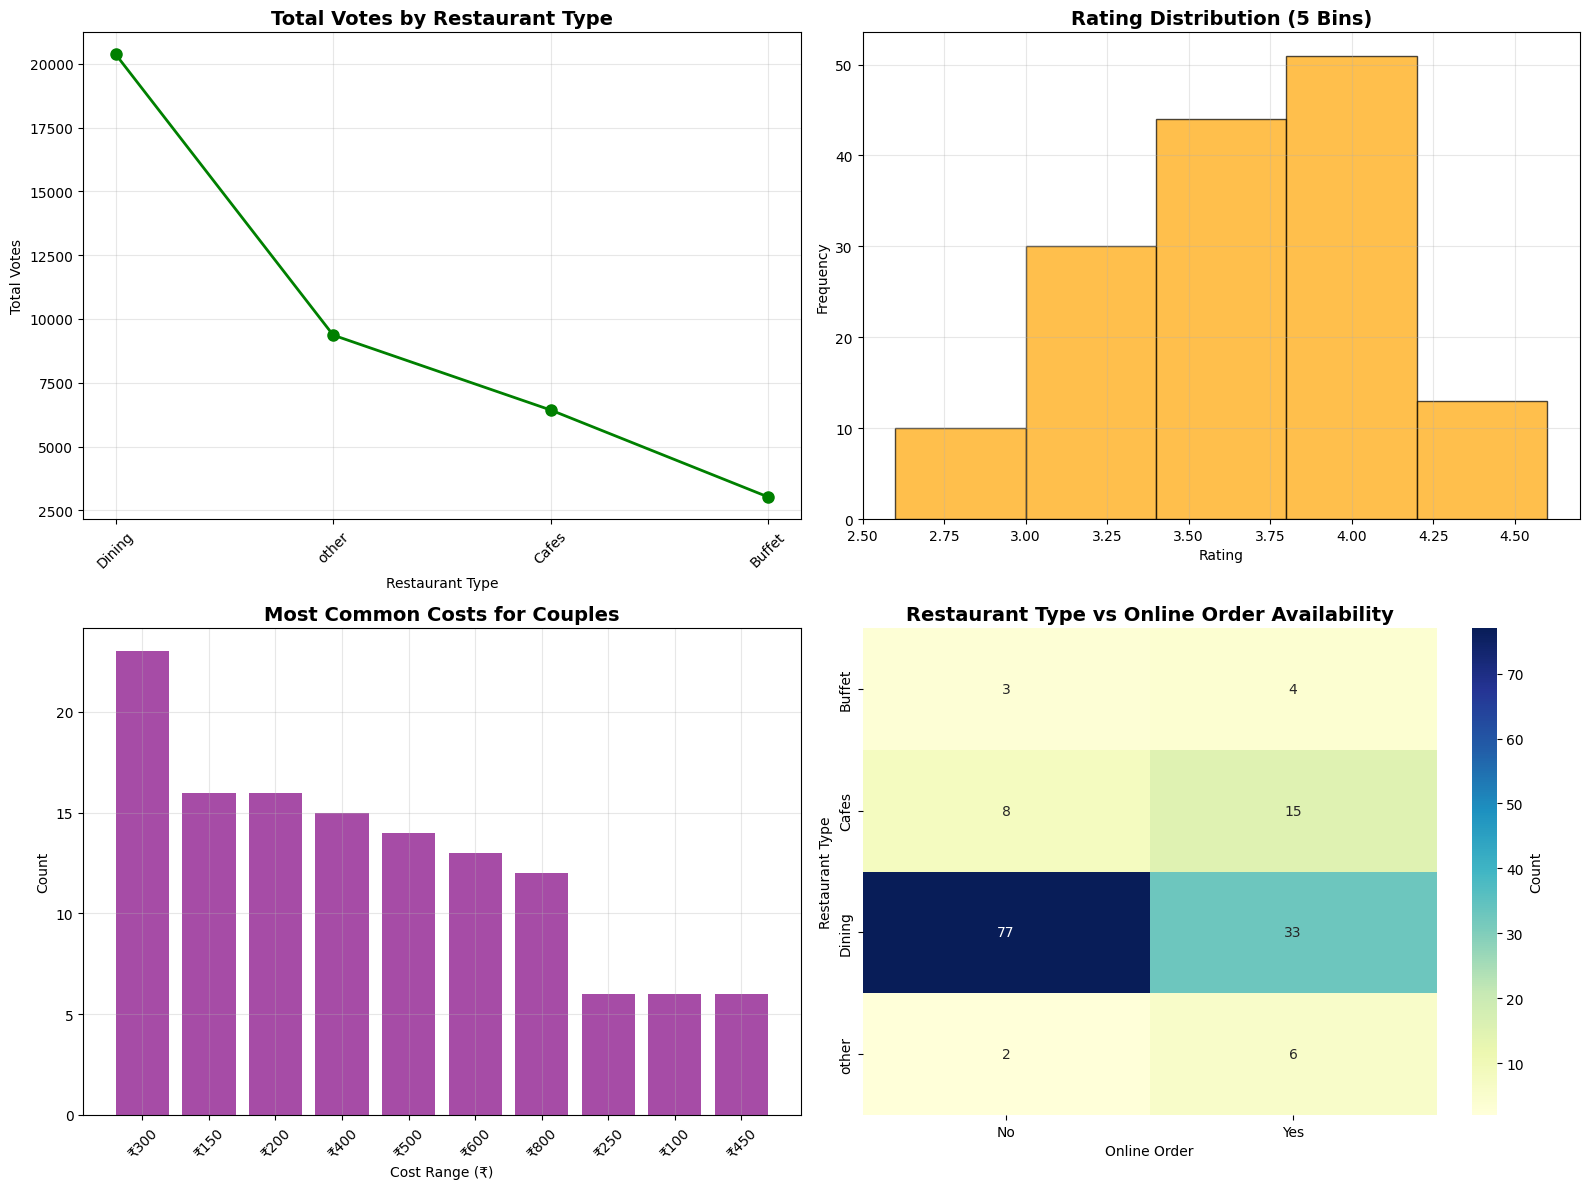


Advanced Statistical Tests:
T-test for Online Order vs Rating: t-statistic = 6.1152, p-value = 0.0000
→ Significant difference in ratings between online and offline restaurants
T-test for Table Booking vs Rating: t-statistic = 4.2321, p-value = 0.0000
→ Significant difference in ratings between table booking and non-booking restaurants


6. ADVANCED ANALYSIS
----------------------------------------
Correlation Analysis:
              rate_numeric     votes  cost_for_two
rate_numeric      1.000000  0.489844      0.275216
votes             0.489844  1.000000      0.324372
cost_for_two      0.275216  0.324372      1.000000

Restaurant with Maximum Votes:
Restaurant(s) with maximum votes (4884):
• Empire Restaurant

Votes by Restaurant Type:
                 votes
restaurant_type       
Dining           20363
other             9367
Cafes             6434
Buffet            3028

Analysis Results Summary:
• Most popular restaurant type: Dining
• Online order preference: online_order
No     

In [5]:
# Zomato Dataset - Comprehensive Exploratory Data Analysis (EDA)
# ================================================================
# GOOGLE COLAB COMPATIBLE VERSION
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# ================================================================
# STEP 1: DATA LOADING AND INITIAL INSPECTION
# ================================================================

print("="*60)
print("ZOMATO DATASET - EXPLORATORY DATA ANALYSIS")
print("="*60)



df = pd.read_csv("/content/Zomato-data-.csv")

print("\n1. INITIAL DATA INSPECTION")
print("-" * 40)

# Basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of Restaurants: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nDataset Info:")
df.info()

# ================================================================
# STEP 2: DATA QUALITY ASSESSMENT
# ================================================================

print("\n\n2. DATA QUALITY ASSESSMENT")
print("-" * 40)

# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = ['name', 'online_order', 'book_table', 'listed_in(type)']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

# ================================================================
# STEP 3: DATA CLEANING
# ================================================================

print("\n\n3. DATA CLEANING")
print("-" * 40)

# Create a copy for cleaning
df_clean = df.copy()

# Clean the 'rate' column - extract numeric rating
print("Cleaning 'rate' column...")
def handleRate(value):
    """
    Clean and convert rating values to float
    Handles formats like '4.1/5', 'NEW', '-', etc.
    """
    try:
        if pd.isna(value) or value == 'NEW' or value == '-':
            return np.nan
        value = str(value).split('/')
        value = value[0]
        return float(value)
    except:
        return np.nan

df_clean['rate'] = df_clean['rate'].apply(handleRate)
# Keep both original and numeric rating for compatibility
df_clean['rate_numeric'] = df_clean['rate']

# Clean the 'approx_cost(for two people)' column
print("Cleaning 'approx_cost(for two people)' column...")
def clean_cost(cost):
    if pd.isna(cost):
        return np.nan
    if isinstance(cost, str):
        # Remove commas and convert to numeric
        cost_clean = cost.replace(',', '')
        try:
            return float(cost_clean)
        except:
            return np.nan
    return cost

df_clean['cost_for_two'] = df_clean['approx_cost(for two people)'].apply(clean_cost)

# Clean votes column
df_clean['votes'] = pd.to_numeric(df_clean['votes'], errors='coerce')

# Rename columns for easier handling
df_clean = df_clean.rename(columns={
    'listed_in(type)': 'restaurant_type',
    'approx_cost(for two people)': 'approx_cost_original'
})

print("Data cleaning completed!")
print(f"Cleaned dataset shape: {df_clean.shape}")

# ================================================================
# STEP 4: DESCRIPTIVE STATISTICS
# ================================================================

print("\n\n4. DESCRIPTIVE STATISTICS")
print("-" * 40)

# Numerical columns statistics
numerical_cols = ['rate_numeric', 'votes', 'cost_for_two']
print("Numerical Columns Statistics:")
print(df_clean[numerical_cols].describe())

# Categorical columns distribution
print("\nCategorical Columns Distribution:")
categorical_cols = ['online_order', 'book_table', 'restaurant_type']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())

# ================================================================
# STEP 5: DATA VISUALIZATION
# ================================================================

print("\n\n5. DATA VISUALIZATION")
print("-" * 40)

# Set up the plotting environment for Google Colab
plt.rcParams['figure.figsize'] = (15, 10)

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 24))

# Enable inline plotting for Colab
%matplotlib inline

# 1. Distribution of Ratings
plt.subplot(4, 3, 1)
df_clean['rate_numeric'].dropna().hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Restaurant Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. Distribution of Cost for Two
plt.subplot(4, 3, 2)
df_clean['cost_for_two'].dropna().hist(bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Cost for Two People', fontsize=14, fontweight='bold')
plt.xlabel('Cost (INR)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 3. Distribution of Votes
plt.subplot(4, 3, 3)
df_clean['votes'].dropna().hist(bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribution of Votes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 4. Online Order Availability
plt.subplot(4, 3, 4)
online_order_counts = df_clean['online_order'].value_counts()
colors = ['coral', 'skyblue']
bars = plt.bar(online_order_counts.index, online_order_counts.values, color=colors)
plt.title('Online Order Availability', fontsize=14, fontweight='bold')
plt.xlabel('Online Order Available')
plt.ylabel('Number of Restaurants')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# 5. Table Booking vs Rating
plt.subplot(4, 3, 5)
book_table_rating = df_clean.groupby('book_table')['rate_numeric'].mean().dropna()
book_table_rating.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Average Rating by Table Booking Availability', fontsize=14, fontweight='bold')
plt.xlabel('Table Booking Available')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# 6. Restaurant Type Distribution
plt.subplot(4, 3, 6)
restaurant_type_counts = df_clean['restaurant_type'].value_counts()
colors = sns.color_palette("husl", len(restaurant_type_counts))
bars = plt.bar(restaurant_type_counts.index, restaurant_type_counts.values, color=colors)
plt.title('Restaurant Types Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.grid(True, alpha=0.3)

# 7. Cost vs Rating Scatter Plot
plt.subplot(4, 3, 7)
plt.scatter(df_clean['cost_for_two'], df_clean['rate_numeric'], alpha=0.6, color='purple')
plt.title('Cost vs Rating Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

# 8. Votes vs Rating Scatter Plot
plt.subplot(4, 3, 8)
plt.scatter(df_clean['votes'], df_clean['rate_numeric'], alpha=0.6, color='red')
plt.title('Votes vs Rating Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

# 9. Average Cost by Restaurant Type
plt.subplot(4, 3, 9)
avg_cost_by_type = df_clean.groupby('restaurant_type')['cost_for_two'].mean().dropna()
avg_cost_by_type.plot(kind='bar', color='teal')
plt.title('Average Cost by Restaurant Type', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost (INR)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 10. Box plot for Rating by Restaurant Type
plt.subplot(4, 3, 10)
restaurant_types = df_clean['restaurant_type'].unique()
rating_data = [df_clean[df_clean['restaurant_type']==rt]['rate_numeric'].dropna() for rt in restaurant_types]
plt.boxplot(rating_data, labels=restaurant_types)
plt.title('Rating Distribution by Restaurant Type', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 11. Correlation Heatmap
plt.subplot(4, 3, 11)
correlation_data = df_clean[['rate_numeric', 'votes', 'cost_for_two']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')

# 12. Top 10 Restaurants by Rating
plt.subplot(4, 3, 12)
top_restaurants = df_clean.nlargest(10, 'rate_numeric')[['name', 'rate_numeric']]
plt.barh(range(len(top_restaurants)), top_restaurants['rate_numeric'], color='mediumseagreen')
plt.yticks(range(len(top_restaurants)), top_restaurants['name'])
plt.title('Top 10 Restaurants by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create additional detailed visualizations
plt.figure(figsize=(16, 12))

# 1. Votes by Restaurant Type (Line Plot)
plt.subplot(2, 2, 1)
grouped_data = df_clean.groupby('restaurant_type')['votes'].sum().sort_values(ascending=False)
plt.plot(range(len(grouped_data)), grouped_data.values, c='green', marker='o', linewidth=2, markersize=8)
plt.title('Total Votes by Restaurant Type', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(range(len(grouped_data)), grouped_data.index, rotation=45)
plt.grid(True, alpha=0.3)

# 2. Rating Distribution (Histogram with 5 bins)
plt.subplot(2, 2, 2)
plt.hist(df_clean['rate_numeric'].dropna(), bins=5, edgecolor='black', alpha=0.7, color='orange')
plt.title('Rating Distribution (5 Bins)', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 3. Most Common Costs for Couples
plt.subplot(2, 2, 3)
cost_counts = df_clean['cost_for_two'].value_counts().head(10)
plt.bar(range(len(cost_counts)), cost_counts.values, color='purple', alpha=0.7)
plt.title('Most Common Costs for Couples', fontsize=14, fontweight='bold')
plt.xlabel('Cost Range (₹)')
plt.ylabel('Count')
plt.xticks(range(len(cost_counts)), [f'₹{int(cost)}' for cost in cost_counts.index], rotation=45)
plt.grid(True, alpha=0.3)

# 4. Heatmap for Restaurant Type vs Online Order
plt.subplot(2, 2, 4)
pivot_table = df_clean.pivot_table(index='restaurant_type', columns='online_order',
                                   aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Restaurant Type vs Online Order Availability', fontsize=14, fontweight='bold')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')

plt.tight_layout()
plt.show()

# Statistical significance tests
print("\nAdvanced Statistical Tests:")

# T-test for online order vs rating
online_yes = df_clean[df_clean['online_order'] == 'Yes']['rate_numeric'].dropna()
online_no = df_clean[df_clean['online_order'] == 'No']['rate_numeric'].dropna()

if len(online_yes) > 0 and len(online_no) > 0:
    t_stat, p_value = stats.ttest_ind(online_yes, online_no)
    print(f"T-test for Online Order vs Rating: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant difference in ratings between online and offline restaurants")
    else:
        print("→ No significant difference in ratings between online and offline restaurants")

# T-test for table booking vs rating
book_yes = df_clean[df_clean['book_table'] == 'Yes']['rate_numeric'].dropna()
book_no = df_clean[df_clean['book_table'] == 'No']['rate_numeric'].dropna()

if len(book_yes) > 0 and len(book_no) > 0:
    t_stat, p_value = stats.ttest_ind(book_yes, book_no)
    print(f"T-test for Table Booking vs Rating: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant difference in ratings between table booking and non-booking restaurants")
    else:
        print("→ No significant difference in ratings between table booking and non-booking restaurants")

# ================================================================
# STEP 6: ADVANCED ANALYSIS
# ================================================================

print("\n\n6. ADVANCED ANALYSIS")
print("-" * 40)

# Correlation analysis
print("Correlation Analysis:")
correlation_matrix = df_clean[['rate_numeric', 'votes', 'cost_for_two']].corr()
print(correlation_matrix)

# Find restaurant with maximum votes
print("\nRestaurant with Maximum Votes:")
max_votes = df_clean['votes'].max()
restaurant_with_max_votes = df_clean.loc[df_clean['votes'] == max_votes, 'name']
print(f"Restaurant(s) with maximum votes ({max_votes}):")
for restaurant in restaurant_with_max_votes:
    print(f"• {restaurant}")

# Votes by Restaurant Type
print("\nVotes by Restaurant Type:")
grouped_data = df_clean.groupby('restaurant_type')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
print(result.sort_values('votes', ascending=False))

# Analysis results summary
print(f"\nAnalysis Results Summary:")
print(f"• Most popular restaurant type: {df_clean['restaurant_type'].mode()[0]}")
print(f"• Online order preference: {df_clean['online_order'].value_counts()}")
most_common_cost = df_clean['cost_for_two'].mode()
if len(most_common_cost) > 0:
    print(f"• Most preferred cost for couples: ₹{most_common_cost[0]}")

# Rating range analysis
rating_ranges = pd.cut(df_clean['rate_numeric'].dropna(), bins=[0, 2.5, 3.5, 4.0, 4.5, 5.0],
                      labels=['Poor (0-2.5)', 'Average (2.5-3.5)', 'Good (3.5-4.0)',
                             'Very Good (4.0-4.5)', 'Excellent (4.5-5.0)'])
print(f"\nRating Distribution by Category:")
print(rating_ranges.value_counts())

# ================================================================
# STEP 7: KEY INSIGHTS AND SUMMARY
# ================================================================

print("\n\n7. KEY INSIGHTS AND SUMMARY")
print("-" * 40)

print("Dataset Summary:")
print(f"• Total restaurants analyzed: {len(df_clean)}")
print(f"• Average rating: {df_clean['rate_numeric'].mean():.2f}")
print(f"• Average cost for two: ₹{df_clean['cost_for_two'].mean():.0f}")
print(f"• Most common restaurant type: {df_clean['restaurant_type'].mode()[0]}")

print(f"\nOnline Order Statistics:")
online_stats = df_clean['online_order'].value_counts()
print(f"• Restaurants offering online orders: {online_stats.get('Yes', 0)} ({online_stats.get('Yes', 0)/len(df_clean)*100:.1f}%)")

print(f"\nTable Booking Statistics:")
booking_stats = df_clean['book_table'].value_counts()
print(f"• Restaurants offering table booking: {booking_stats.get('Yes', 0)} ({booking_stats.get('Yes', 0)/len(df_clean)*100:.1f}%)")

print(f"\nTop 5 Highest Rated Restaurants:")
top_5 = df_clean.nlargest(5, 'rate_numeric')[['name', 'rate_numeric', 'restaurant_type']]
for idx, row in top_5.iterrows():
    print(f"• {row['name']}: {row['rate_numeric']}/5 ({row['restaurant_type']})")

print(f"\nCost Analysis:")
print(f"• Most expensive restaurant type: {df_clean.groupby('restaurant_type')['cost_for_two'].mean().idxmax()}")
print(f"• Most affordable restaurant type: {df_clean.groupby('restaurant_type')['cost_for_two'].mean().idxmin()}")

print("\n" + "="*60)
print("ANALYSIS COMPLETED!")
print("="*60)